# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            print(col,app_train[col])
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

NAME_CONTRACT_TYPE 0              Cash loans
1              Cash loans
2         Revolving loans
3              Cash loans
4              Cash loans
5              Cash loans
6              Cash loans
7              Cash loans
8              Cash loans
9         Revolving loans
10             Cash loans
11             Cash loans
12             Cash loans
13             Cash loans
14             Cash loans
15             Cash loans
16             Cash loans
17        Revolving loans
18        Revolving loans
19             Cash loans
20        Revolving loans
21             Cash loans
22             Cash loans
23             Cash loans
24             Cash loans
25             Cash loans
26             Cash loans
27             Cash loans
28             Cash loans
29        Revolving loans
               ...       
307481         Cash loans
307482         Cash loans
307483         Cash loans
307484         Cash loans
307485    Revolving loans
307486         Cash loans
307487         Cash

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [5]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [14]:
target_corr=app_train.corr()['TARGET']


In [50]:
df_target_corr = pd.DataFrame(target_corr.sort_values(kind="quicksort"))


In [83]:
max_target = df_target_corr.tail(n=16)
min_target = df_target_corr.head(n=15)

In [99]:
max_target

,TARGET
FLAG_WORK_PHONE,0.028524
DEF_60_CNT_SOCIAL_CIRCLE,0.031276
DEF_30_CNT_SOCIAL_CIRCLE,0.032248
LIVE_CITY_NOT_WORK_CITY,0.032518
OWN_CAR_AGE,0.037612
DAYS_REGISTRATION,0.041975
FLAG_DOCUMENT_3,0.044346
REG_CITY_NOT_LIVE_CITY,0.044395
FLAG_EMP_PHONE,0.045982
REG_CITY_NOT_WORK_CITY,0.050994


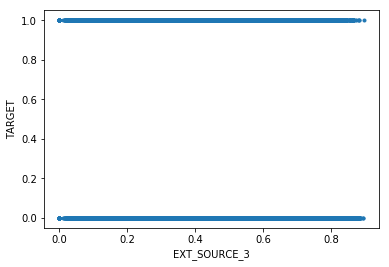

In [86]:
plt.plot(app_train['EXT_SOURCE_3'], app_train['TARGET'], '.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET')
plt.show()

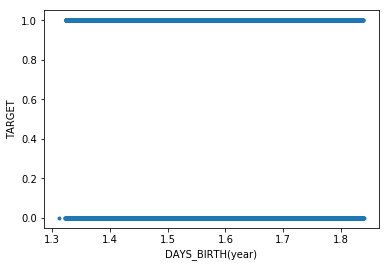

In [132]:
plt.plot(np.log10(app_train['DAYS_BIRTH']/(-365)), app_train['TARGET'], '.')
plt.xlabel('DAYS_BIRTH(year)')
plt.ylabel('TARGET')
plt.show()

In [124]:
np.log10(app_train['DAYS_BIRTH']/(-365))

0         1.413644
1         1.662111
2         1.717511
3         1.716575
4         1.737258
5         1.666646
6         1.576893
7         1.713018
8         1.740882
9         1.598146
10        1.446180
11        1.747699
12        1.566074
13        1.586495
14        1.601554
15        1.378622
16        1.549339
17        1.427868
18        1.686122
19        1.492626
20        1.699018
21        1.608409
22        1.484826
23        1.832631
24        1.490247
25        1.724029
26        1.710106
27        1.640413
28        1.437446
29        1.452270
            ...   
307481    1.752501
307482    1.587111
307483    1.834098
307484    1.546509
307485    1.515910
307486    1.642098
307487    1.801789
307488    1.441684
307489    1.654427
307490    1.432200
307491    1.478151
307492    1.759202
307493    1.681563
307494    1.612581
307495    1.758310
307496    1.676881
307497    1.659877
307498    1.718786
307499    1.667849
307500    1.747124
307501    1.550346
307502    1.